In [1]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d juhi1994/superstore
! unzip "superstore.zip"

Dataset URL: https://www.kaggle.com/datasets/juhi1994/superstore
License(s): unknown
100% 0.98M/0.98M [00:00<00:00, 4.21MB/s]
100% 0.98M/0.98M [00:00<00:00, 4.21MB/s]
Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [3]:
import pandas as pd
import plotly.express as px
from plotnine import *
import numpy as np

1. Data Preparation:

In [100]:
data = pd.read_excel("US Superstore data.xls")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [101]:
data.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [11]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

2. Data Visualization With Plotly:

* Create an interactive line chart to show sales trends over the years.

In [28]:
len(data["Sales"].unique())

6144

In [40]:
data_grouped = data.groupby(['Year', 'Category'])['Sales'].sum().reset_index()
line_chart=px.line(data_grouped, x='Year', y='Sales', color='Category', title='Sales trends over the years')
line_chart.show()

In [63]:
data["Total Sales"] = data["Sales"] * data["Quantity"]
data_grouped = data.groupby(['Year', 'Category'])['Total Sales'].sum().reset_index()
line_chart=px.line(data_grouped, x='Year', y='Total Sales', color='Category', title='Sales trends over the years')
line_chart.show()

I have decided to group data that our graph will include less data and be more readable.

* Build an interactive map to visualize sales distribution by country.

In [93]:
from plotly.graph_objects import Figure
import plotly.graph_objects as go

In [42]:
data["Country"].unique()

array(['United States'], dtype=object)

In [78]:
cities=data["City"].unique()
print(len(cities))
print(cities)

531
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersb

In [111]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv'
city_data = pd.read_csv(url)
city_sales = data.groupby('City')['Sales'].sum().reset_index()
data['text'] = data['City'] + ' - $' + data['Sales'].astype(str)
colors = ["royalblue", "crimson", "lightseagreen", "orange", "lightgrey"]
scale = 5000
fig = Figure()

cities = city_sales['City'].tolist()
data_cities=[city_data['name'].unique()]
print(data_cities)
print(cities)
# for city in cities:
#     if city in city_data['name'].unique():
#         df_sub = city_data[city_data['name'] == city]
#         print(city)
#         fig.add_trace(go.Scattergeo(
#             locationmode='USA-states',
#             lon=df_sub['lon'],
#             lat=df_sub['lat'],
#             text=df_sub['text'],
#             marker=dict(
#                 size=city['Sales'] / scale,
#                 line_color='rgb(40,40,40)',
#                 line_width=0.5,
#                 sizemode='area',
#                 color=colors[city_sales[city_sales['City'] == city].index[0]]
#             ),
#             name=city
#         ))

# fig.update_layout(
#     title_text='Sales Distribution by Cities in USA',
#     showlegend=True,
#     geo=dict(
#         scope='usa',
#         landcolor='rgb(217, 217, 217)',
#     )
# )

# fig.show()

[array(['New York ', 'Los Angeles ', 'Chicago ', ..., 'Spanish Fort ',
       'Plaquemine ', 'Milton-Freewater '], dtype=object)]
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream', 'Carrollton', 'Cary'

 3. Data Visualization With Plotnine:

* Use Plotnine to generate a bar chart showing top 10 products by sales.

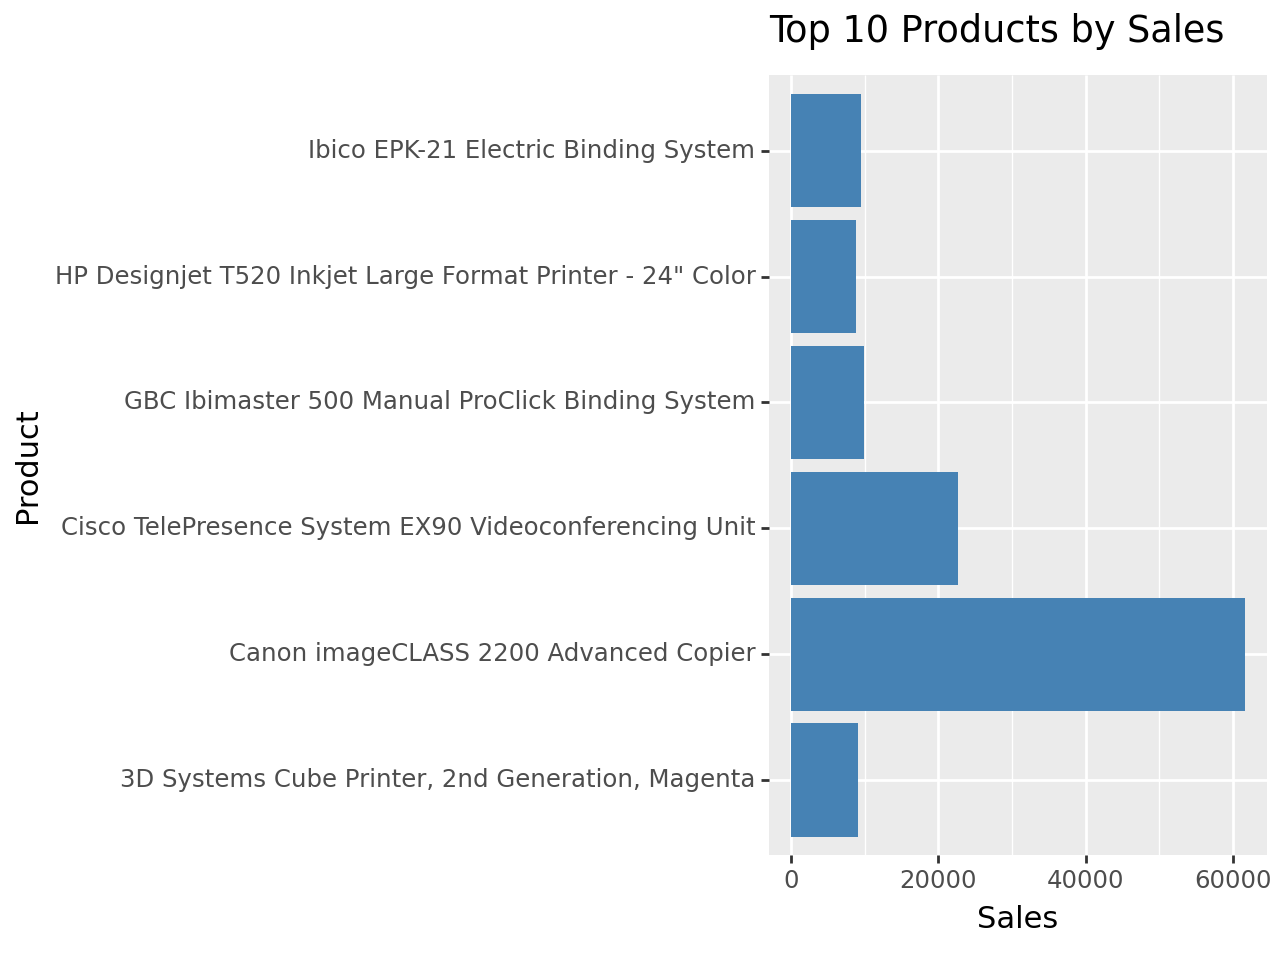

In [60]:
top_10_products = data.sort_values(by='Sales', ascending=False).head(10)
bar_chart = (
    ggplot(top_10_products, aes(x='Product Name', y='Sales'))
    + geom_bar(stat='identity', fill='steelblue')
    + labs(title='Top 10 Products by Sales', x='Product', y='Sales')
    +coord_flip())
print(bar_chart)

* Create a scatter plot to analyze the relationship between profit and discount.

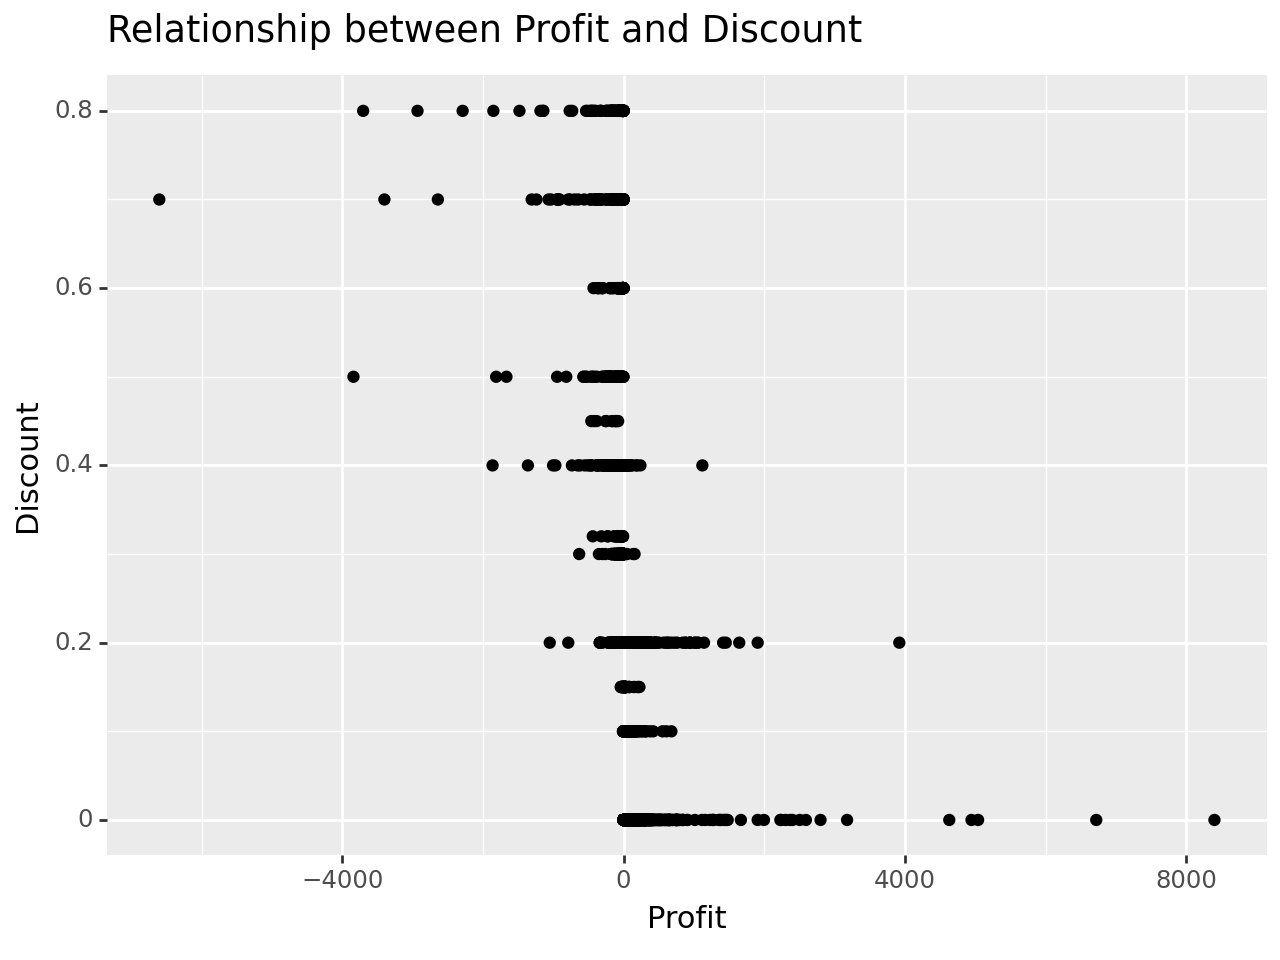

In [61]:
scattter_plot= (
    ggplot(data, aes(x='Profit', y='Discount'))
    + geom_point()
    + labs(title='Relationship between Profit and Discount', x='Profit', y='Discount')
)
print(scattter_plot)

4. Comparative Analysis:

* Compare the insights gained from Plotly and Plotnine visualizations.

We can see that Technology is the most interesting and growing category for us, evethough all categories grow through years.

Less discount we give, more profit we get. discount over 40% bring us in minus.

Isights from Plotly more visual and accurate.
Except map graph, Plotly easier in use.

In [64]:
print(data)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 